# DES SN 5YR Tutorial Part 1: Load all Photometry

<img align="left" src = ../_static/images/logo044.jpg width=120 style="padding: 10px"> 
<br><b>Dark Energy Survey Supernova Program</b>

<b>Tutorial Part 1</b>
<b>Load all Photometry</b> <br>
Contact author: Bruno Sánchez<br>

This tutorial is intended to show how to use the `dessndr` python package to load some of the light-curve data from the DES SN 5YR Data Release.

It will demonstrate how to load a transient record, check its parameters and plot its photometrical light-curve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will load the package `utils` module and `data` module.

`utils` provides functionality to read the data formats

`data` provides with the location of the downloaded DR files.

In [2]:
from dessndr import utils, data

This is the loacation of the cloned DR repository in our system:

In [3]:
print(data.DES5YRDR_DATA)

/Users/sanchez/DES5YRDR_DATA_ROOT/DES-SN5YR


The data module also provides with some functions to get individual files from the repo:

In [4]:
data.clone_repo?

Signature:
data.clone_repo(
    repo_url='https://github.com/des-science/DES-SN5YR',
    dest_folder='/Users/sanchez/DES5YRDR_DATA_ROOT',
)
Docstring: <no docstring>
File:      ~/Data/DES/DESSNDR/DESSN5YR_TESTDR/dessndr/data.py
Type:      function

Now we are going to load the DES photometry files:

In [5]:
# This should be 
# phot_version = os.path.join(data.DES5YRDR_DATA, '0_DATA/DES-SN5YR_DES') 
# Or similar path. Instead we use local files for the moment
phot_version = '/Users/sanchez/Data/DES/organize_DR/DES-SN5YR_DES/DES-SN5YR_DES'

We make use of the `utils.PhotFITS` reader class. We make an instance pointing to the photometry version we want to use (SMP nominal files or DIFFIMG).

In [6]:
phot = utils.PhotFITS(phot_version)

/Users/sanchez/.virtualenvs/desdr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sanchez/.virtualenvs/desdr/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


We can inspect some of the details of `phot` instance now, checking the header and photometry table. 

Both are pandas DataFrame instances, related by the `SNID` (or more precisely Candidate ID `CID`)

In [7]:
phot.head_df.head()

,SNID,IAUC,FAKE,MASK_FLUXCOR_SNANA,RA,DEC,PIXSIZE,NXPIX,NYPIX,SNTYPE,...,HOSTGAL_SB_FLUXCAL_g,HOSTGAL_SB_FLUXCAL_r,HOSTGAL_SB_FLUXCAL_i,HOSTGAL_SB_FLUXCAL_z,PEAKMJD,MJD_TRIGGER,MJD_DETECT_FIRST,MJD_DETECT_LAST,SEARCH_TYPE,PRIVATE(AGN_SCAN)
0,1642082,b'UNKNOWN ',0,0,35.169212,-5.698688,0.263,2048,4096,0,...,27.120001,78.250000,109.330002,138.820007,57739.117188,57756.070312,57739.117188,57756.070312,-9,-1.0
1,1294480,b'UNKNOWN ',0,0,34.010349,-5.383460,0.263,2048,4096,0,...,28.950001,138.470001,249.429993,354.040009,56956.085938,-9.000000,56956.085938,57311.109375,-9,-1.0
2,1402031,b'UNKNOWN ',0,0,8.426459,-44.096779,0.263,2048,4096,0,...,-1.510000,2.420000,1.830000,-1.640000,0.010000,-9.000000,57642.109375,-9.000000,-9,-1.0
3,1690045,b'UNKNOWN ',0,0,34.245853,-5.856924,0.263,2048,4096,0,...,1.550000,3.490000,4.090000,5.510000,57773.062500,57763.066406,57756.054688,57781.058594,-9,1.0
4,1905022,b'UNKNOWN ',0,0,6.930402,-42.952053,0.263,2048,4096,0,...,77.339996,119.080002,142.720001,147.770004,58014.066406,58071.031250,57985.218750,58071.031250,-9,-1.0


We can see how many columns of metadata the `header` contains.

Here we can basically find a single row per event, with all the ancilliary information useful for cosmology.

In [8]:
phot.head_df.columns

Index(['SNID', 'IAUC', 'FAKE', 'MASK_FLUXCOR_SNANA', 'RA', 'DEC', 'PIXSIZE',
       'NXPIX', 'NYPIX', 'SNTYPE', 'NOBS', 'PTROBS_MIN', 'PTROBS_MAX', 'MWEBV',
       'MWEBV_ERR', 'REDSHIFT_HELIO', 'REDSHIFT_HELIO_ERR', 'REDSHIFT_FINAL',
       'REDSHIFT_FINAL_ERR', 'REDSHIFT_QUALITYFLAG', 'MASK_REDSHIFT_SOURCE',
       'VPEC', 'VPEC_ERR', 'HOSTGAL_NMATCH', 'HOSTGAL_NMATCH2',
       'HOSTGAL_OBJID', 'HOSTGAL_FLAG', 'HOSTGAL_PHOTOZ', 'HOSTGAL_PHOTOZ_ERR',
       'HOSTGAL_SPECZ', 'HOSTGAL_SPECZ_ERR', 'HOSTGAL_RA', 'HOSTGAL_DEC',
       'HOSTGAL_SNSEP', 'HOSTGAL_DDLR', 'HOSTGAL_CONFUSION', 'HOSTGAL_LOGMASS',
       'HOSTGAL_LOGMASS_ERR', 'HOSTGAL_LOGSFR', 'HOSTGAL_LOGSFR_ERR',
       'HOSTGAL_LOGsSFR', 'HOSTGAL_LOGsSFR_ERR', 'HOSTGAL_COLOR',
       'HOSTGAL_COLOR_ERR', 'HOSTGAL_ELLIPTICITY', 'HOSTGAL_OBJID2',
       'HOSTGAL_SQRADIUS', 'HOSTGAL_OBJID_UNIQUE', 'HOSTGAL_MAG_g',
       'HOSTGAL_MAG_r', 'HOSTGAL_MAG_i', 'HOSTGAL_MAG_z', 'HOSTGAL_MAGERR_g',
       'HOSTGAL_MAGERR_r', 'HOSTGAL_MAG

We take for example the event 350 in our table:

In [9]:
dict(phot.head_df.iloc[350])

{'SNID': 1449078,
 'IAUC': b'UNKNOWN         ',
 'FAKE': 0,
 'MASK_FLUXCOR_SNANA': 0,
 'RA': 53.647507,
 'DEC': -28.908772,
 'PIXSIZE': 0.263,
 'NXPIX': 2048,
 'NYPIX': 4096,
 'SNTYPE': 29,
 'NOBS': 126,
 'PTROBS_MIN': 34555,
 'PTROBS_MAX': 34680,
 'MWEBV': 0.007580016,
 'MWEBV_ERR': 0.0003790008,
 'REDSHIFT_HELIO': 0.10876,
 'REDSHIFT_HELIO_ERR': 0.001,
 'REDSHIFT_FINAL': 0.108349,
 'REDSHIFT_FINAL_ERR': 0.001,
 'REDSHIFT_QUALITYFLAG': 0,
 'MASK_REDSHIFT_SOURCE': 0,
 'VPEC': 0.0,
 'VPEC_ERR': 300.0,
 'HOSTGAL_NMATCH': 1,
 'HOSTGAL_NMATCH2': 1,
 'HOSTGAL_OBJID': 102253,
 'HOSTGAL_FLAG': 0,
 'HOSTGAL_PHOTOZ': -999.0,
 'HOSTGAL_PHOTOZ_ERR': -999.0,
 'HOSTGAL_SPECZ': 0.1088,
 'HOSTGAL_SPECZ_ERR': 0.001,
 'HOSTGAL_RA': 53.64729,
 'HOSTGAL_DEC': -28.908779,
 'HOSTGAL_SNSEP': 0.684,
 'HOSTGAL_DDLR': 0.727,
 'HOSTGAL_CONFUSION': -99.0,
 'HOSTGAL_LOGMASS': 7.996,
 'HOSTGAL_LOGMASS_ERR': 0.042,
 'HOSTGAL_LOGSFR': -0.091,
 'HOSTGAL_LOGSFR_ERR': 0.47,
 'HOSTGAL_LOGsSFR': -8.042,
 'HOSTGAL_LOGsSFR

We can check the `CID`, position and `PEAKMJD`:

In [10]:
phot.head_df.iloc[350][['SNID', 'RA', 'DEC', 'PEAKMJD']]

SNID            1449078
RA            53.647507
DEC          -28.908772
PEAKMJD    57686.113281
Name: 350, dtype: object

We see that the `phot` instance table has many rows and each one of them is indexed by the `SNID`. 

`phot` can also show us the list of `SNID` in the files.

In [11]:
len(phot.head_df)

19706

In [12]:
phot.cid_recs

array([1642082, 1294480, 1402031, ..., 1279857, 1246351, 1255127])

We have a search utility to query the `CID` we are interested in:

In [13]:
myCid = phot.cid_recs[350]
print(myCid)

1449078


In [18]:
results = phot.query_cids(myCid)

In [19]:
results[myCid]['RA']

350    53.647507
Name: RA, dtype: float64

This returns a dictionary with keys using our chosen `CID` and the metadata in a nested dictionary.

It also works with lists of `CID`s if needed.

We can load this particular light-curve, for inspection. In this case we make use of the method `get_lc` :

In [20]:
lc = phot.get_lc(myCid)
lc.head()

,MJD,BAND,CCDNUM,IMGNUM,FIELD,PHOTFLAG,PHOTPROB,FLUXCAL,FLUXCALERR,PSF_SIG1,...,PSF_RATIO,SKY_SIG,SKY_SIG_T,RDNOISE,ZEROPT,ZEROPT_ERR,GAIN,XPIX,YPIX,MAG
34555,57623.401,r,20,566629,C2,1,0.0,1.050,8.568,2.375,...,0.0,78.500000,0.0,-9.0,32.273998,0.0,1.02,1963.099976,936.599976,27.447027
34556,57623.403,i,20,566630,C2,1,0.0,6.220,8.368,2.482,...,0.0,97.099998,0.0,-9.0,32.546001,0.0,1.03,1960.199951,940.000000,25.515524
34557,57623.408,z,20,566631,C2,2049,0.0,-11.037,7.819,2.284,...,0.0,162.399994,0.0,-9.0,33.049000,0.0,1.02,1935.000000,954.799988,NaN
34558,57627.392,g,20,568227,C2,1,0.0,1.340,8.981,2.515,...,0.0,45.400002,0.0,-9.0,31.580999,0.0,1.07,1965.199951,951.900024,27.182238
34559,57627.394,r,20,568228,C2,1,0.0,-11.648,13.485,2.551,...,0.0,63.099998,0.0,-9.0,31.596001,0.0,1.02,1952.300049,949.200012,NaN


In [21]:
lc.columns

Index(['MJD', 'BAND', 'CCDNUM', 'IMGNUM', 'FIELD', 'PHOTFLAG', 'PHOTPROB',
       'FLUXCAL', 'FLUXCALERR', 'PSF_SIG1', 'PSF_SIG2', 'PSF_RATIO', 'SKY_SIG',
       'SKY_SIG_T', 'RDNOISE', 'ZEROPT', 'ZEROPT_ERR', 'GAIN', 'XPIX', 'YPIX',
       'MAG'],
      dtype='object')

We obtain another DataFrame with the time-series data loaded in for our `CID`.

We can also use the `get_lcs` for multiple events, providing a list of `CID`s in that case.

Let's try to visualize this light-curve using the `plot` module from `dessndr`

In [24]:
from dessndr import plot

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Supernova Light CurveCID: 1449078'}, xlabel='MJD', ylabel='Flux'>)

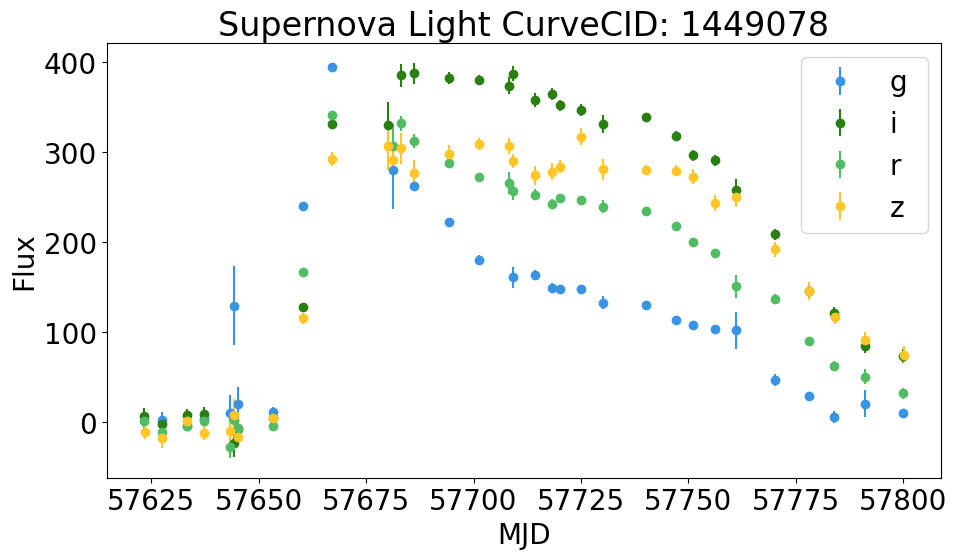

In [25]:
plot.plot_sn_light_curve(lc, CID=myCid, figsize=(10, 6))